 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [127]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [128]:
# Reading whale returns
whale_csv_path = Path("whale_returns.csv")
whale_returns_df = pd.read_csv(whale_csv_path)
whale_returns_df = pd.read_csv(whale_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [129]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [130]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

In [131]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [132]:
# Reading algorithmic returns
algo_csv_path = Path("algo_returns.csv")
algo_returns_df = pd.read_csv(algo_csv_path)
algo_returns_df = pd.read_csv(algo_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df.sort_index(inplace=True)
algo_returns_df.head()



,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [133]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [134]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

In [135]:
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [136]:
# Reading S&P TSX 60 Closing Prices
sp_csv_path = Path("sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_csv_path)
sp_tsx_history_df = pd.read_csv(sp_csv_path, parse_dates=True, infer_datetime_format=True)
sp_tsx_history_df.sort_index(inplace=True)
sp_tsx_history_df.head()


,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [137]:
# Check Data Types
sp_tsx_history_df.dtypes


Date     object
Close    object
dtype: object

In [138]:

sp_tsx_history_df['Date'] = pd.to_datetime(sp_tsx_history_df['Date'])


In [139]:
# Fix Data Types
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace("$","").str.replace(",","").astype(float)



/var/folders/zg/d_sjxxwd5l7d7m4ldb9w689m0000gn/T/ipykernel_45226/147416815.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace("$","").str.replace(",","").astype(float)


In [140]:
#Check Dtypes to verify change
sp_tsx_history_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [141]:
sp_tsx_history_df.head()

,Date,Close
0,2012-10-01,12370.19
1,2012-10-02,12391.23
2,2012-10-03,12359.47
3,2012-10-04,12447.68
4,2012-10-05,12418.99


In [142]:
sp_tsx_history_df = sp_tsx_history_df.set_index('Date')

In [143]:
# Calculate Daily Returns
sp_daily_returns = sp_tsx_history_df.pct_change().dropna().copy()
sp_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


<AxesSubplot:xlabel='Date'>

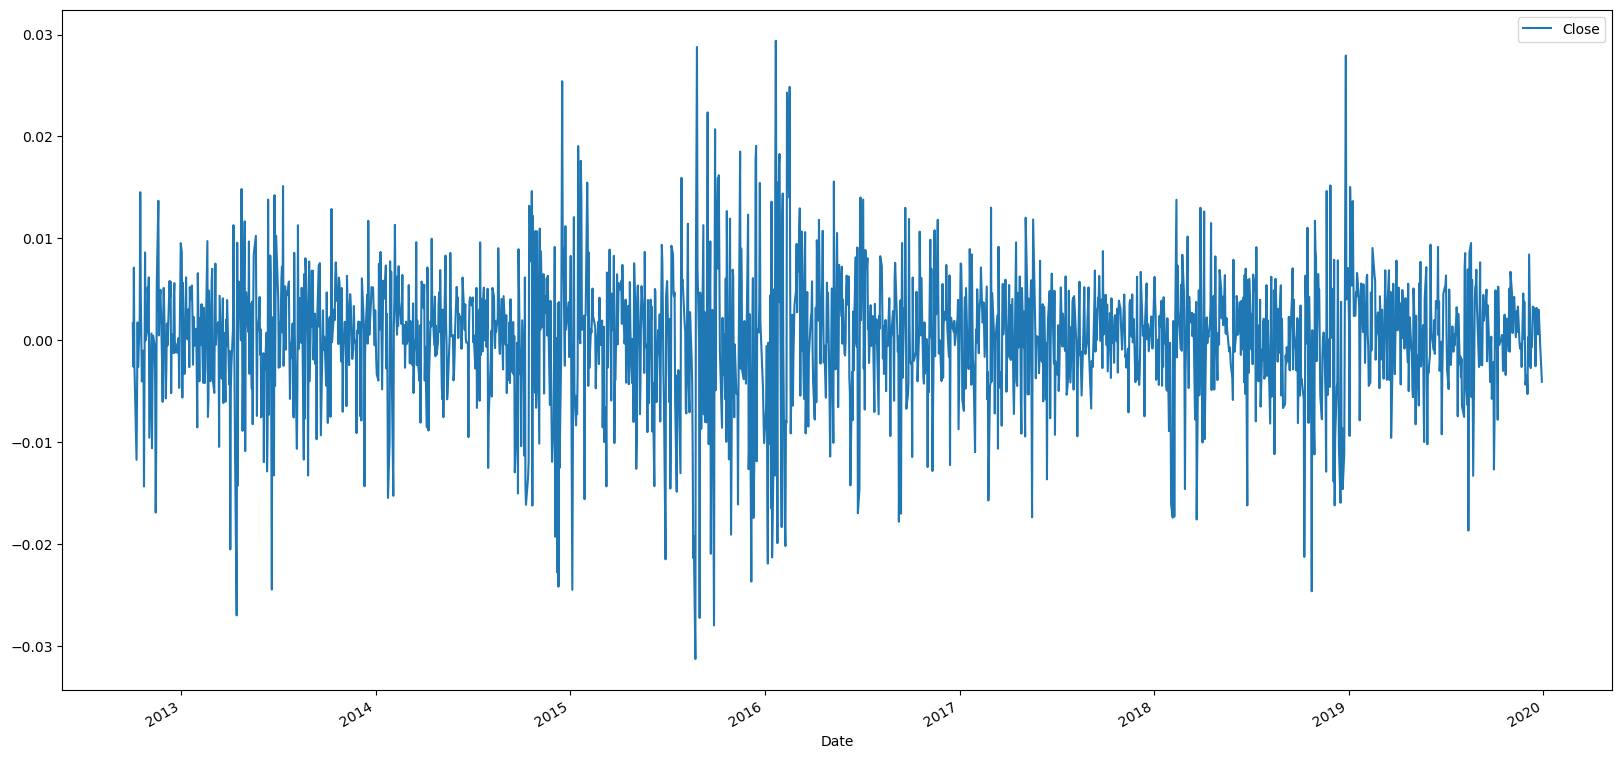

In [144]:
sp_daily_returns.plot(figsize=(20,10))

In [145]:
whale_daily_returns = whale_returns_df.pct_change().dropna().copy()
whale_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672


<AxesSubplot:xlabel='Date'>

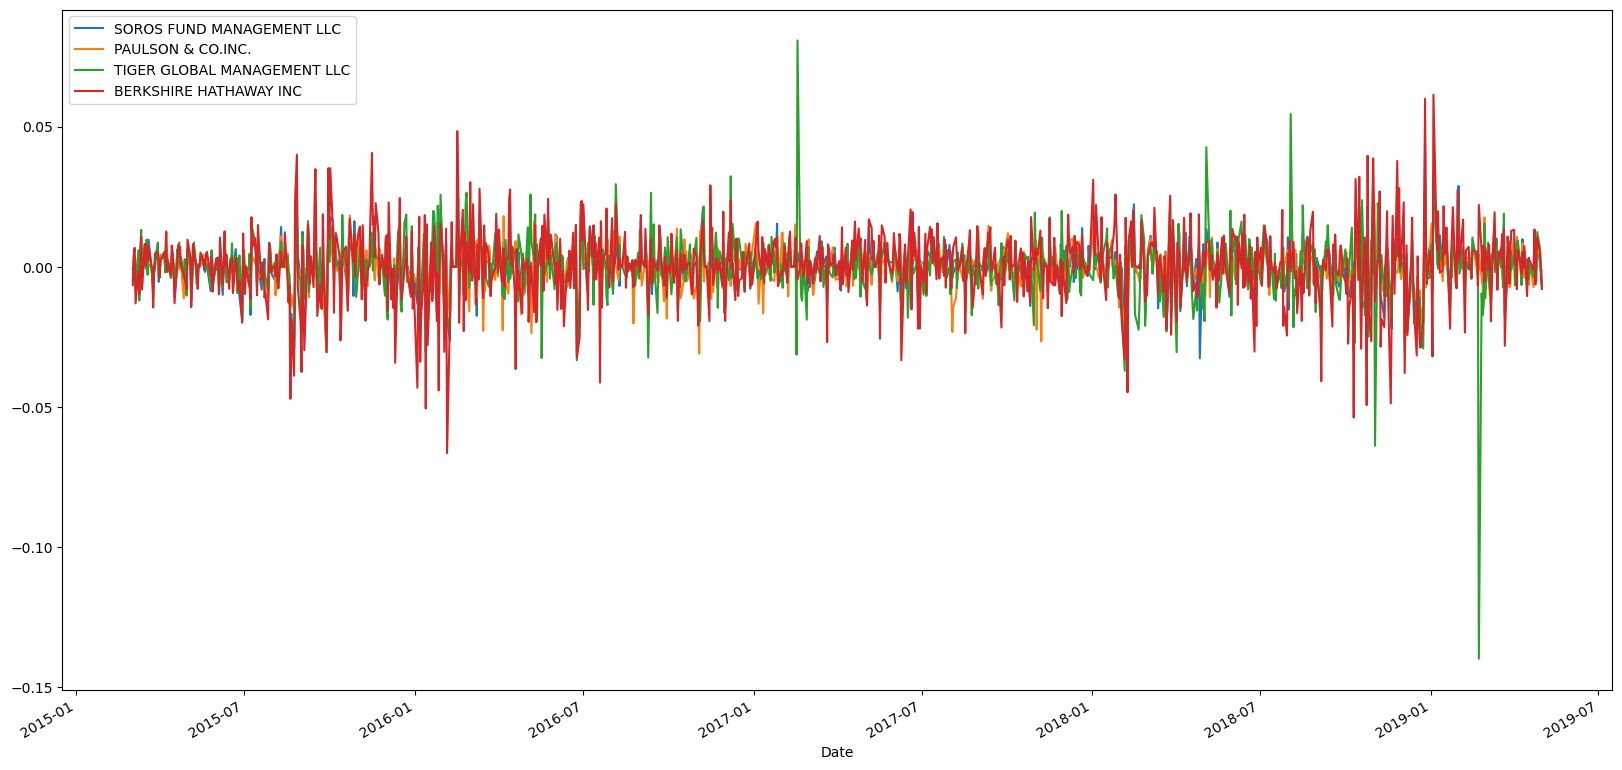

In [146]:

whale_returns_df.plot(figsize=(20,10))

In [147]:
algo_daily_returns = algo_returns_df.pct_change().dropna().copy()
algo_daily_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-06,-0.542965,-0.376459
2014-06-09,-3.699288,-0.315757
2014-06-10,-1.879164,-1.129760
2014-06-11,0.080354,4.113963
2014-06-12,-1.005932,0.021230


<AxesSubplot:xlabel='Date'>

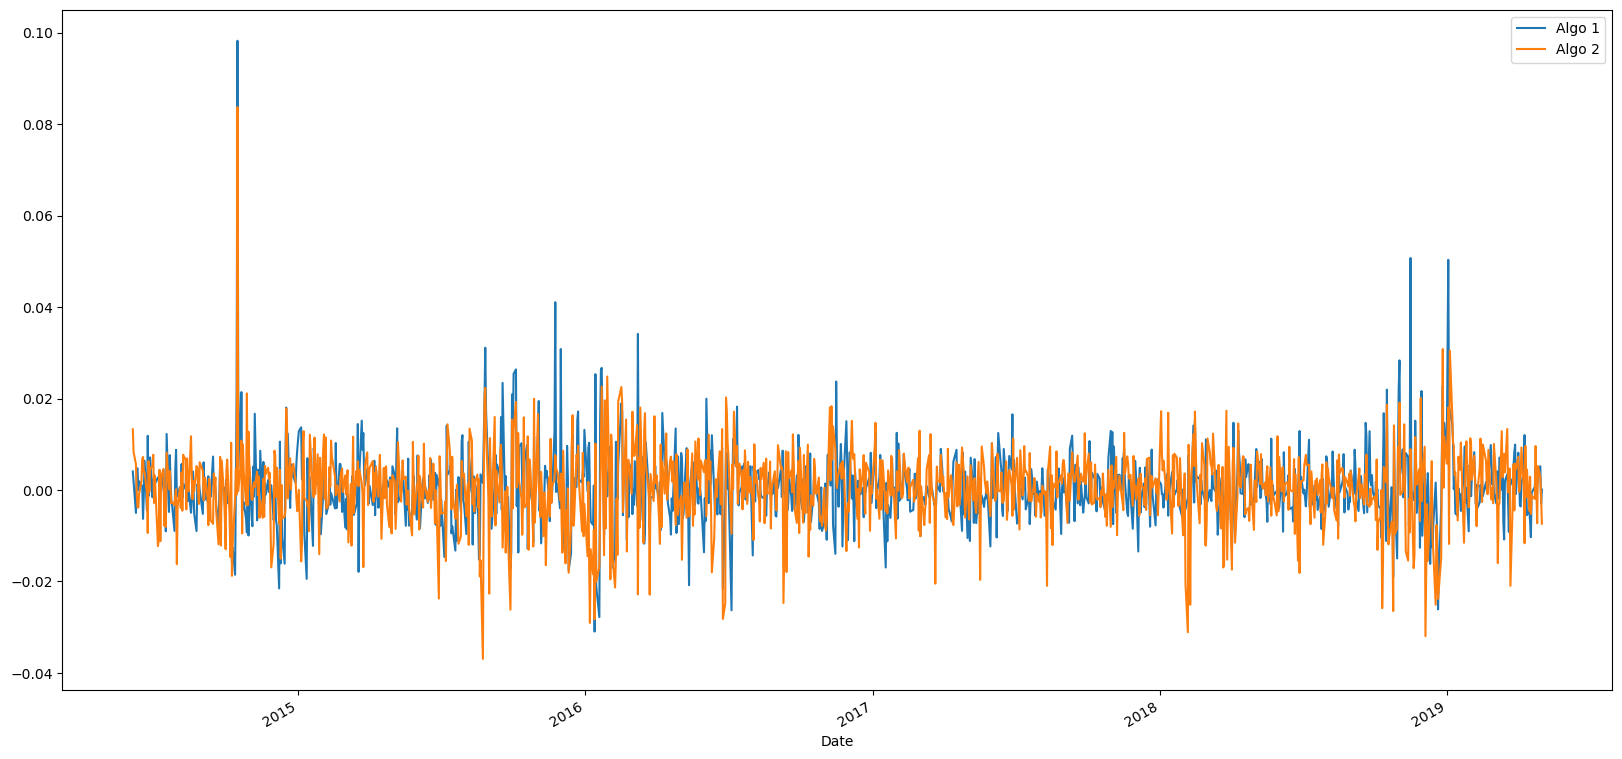

In [148]:
algo_returns_df.plot(figsize=(20,10))

In [149]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_df = sp_tsx_history_df.rename(columns={"Close": "S&P_TSX"})
sp_tsx_history_df.head()

,S&P_TSX
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [150]:
sp_daily_returns = sp_tsx_history_df.pct_change().dropna().copy()
sp_daily_returns.head()

,S&P_TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


<AxesSubplot:xlabel='Date'>

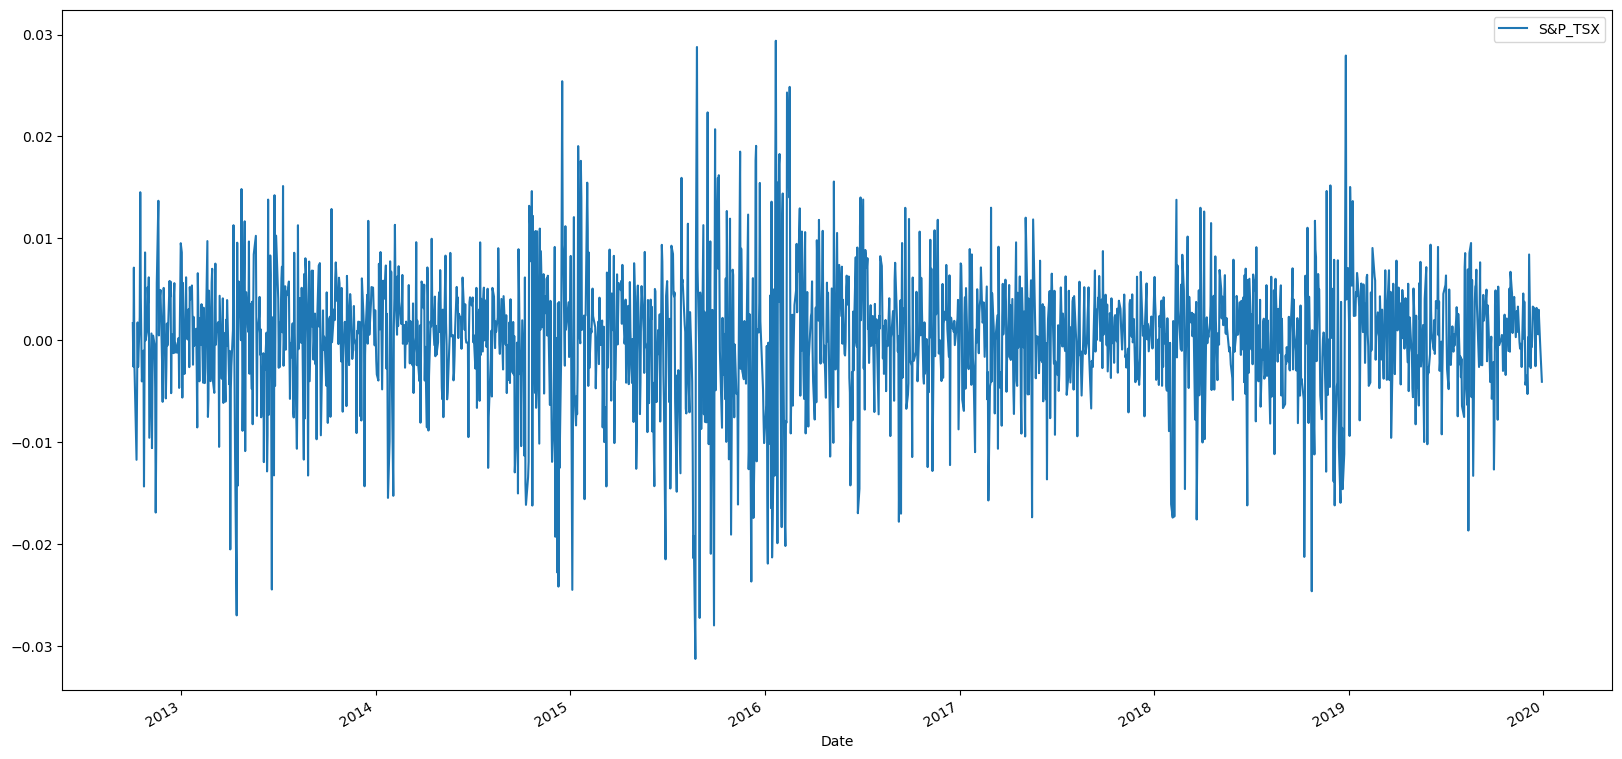

In [151]:
sp_daily_returns.plot(figsize=(20,10))

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [152]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp_daily_returns], axis="columns", join="inner")
                        

# Display a few rows

combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [153]:
# Plot daily returns of all portfolios - (individual assessment completed above)
daily_returns = combined_df.pct_change().dropna().copy()
daily_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.604848
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-1.398717
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-8.420220
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-0.342692
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672,-0.744524,-10.327163,1.184814


<AxesSubplot:xlabel='Date'>

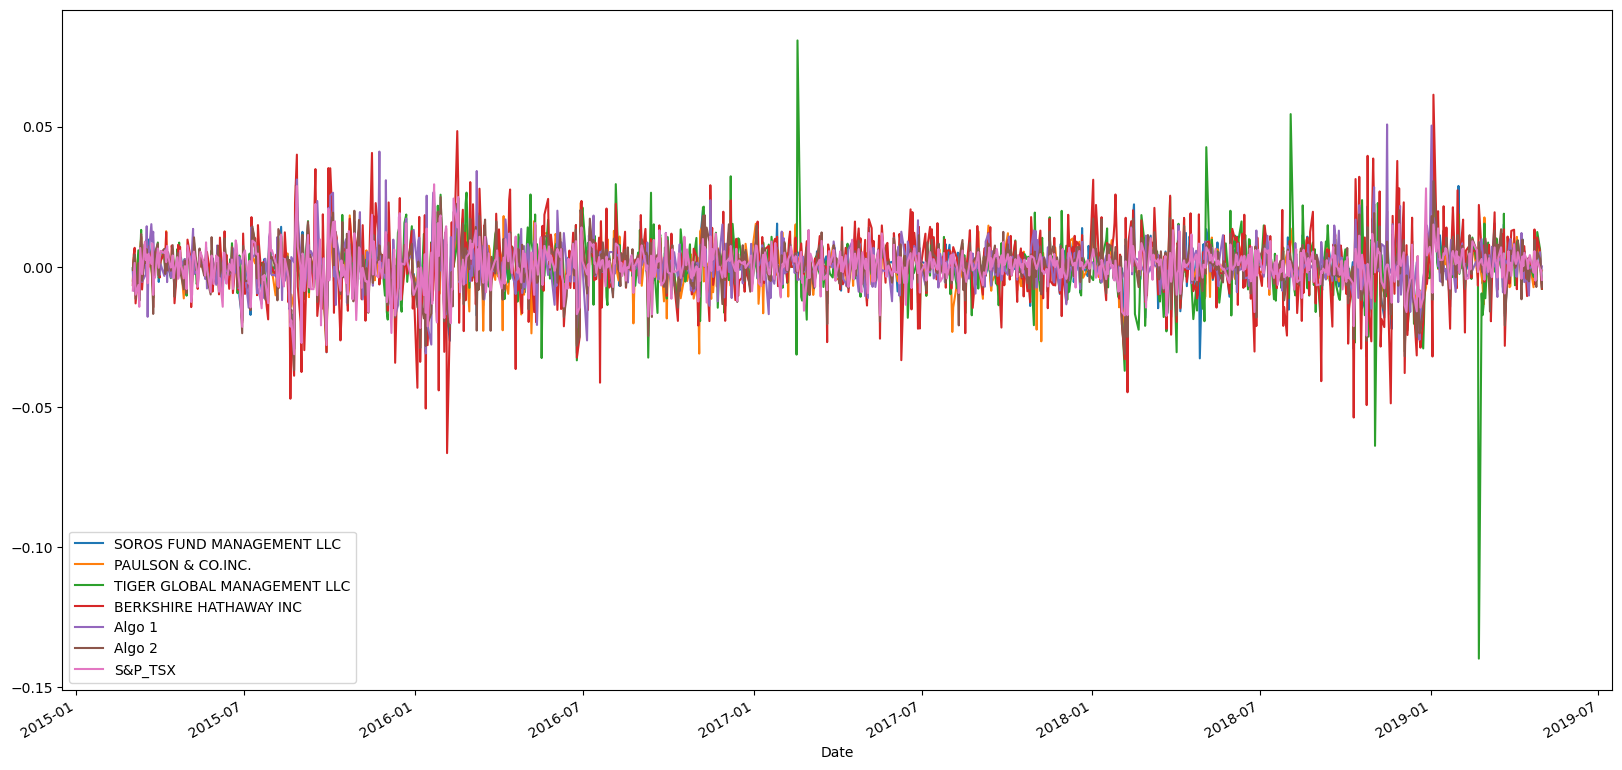

In [154]:
combined_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [155]:
# Calculate cumulative returns of all portfolios
# Plot cumulative returns
whale_cumulative_returns = (1 + whale_returns_df).cumprod() 
whale_cumulative_returns.head()





,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431
2015-03-04,1.000962,0.998245,0.996972,0.997617
2015-03-05,1.004981,1.002314,0.999319,1.004327
2015-03-06,0.997037,0.998731,0.990844,0.991172
2015-03-09,0.997617,1.002951,0.996633,0.989534


<AxesSubplot:xlabel='Date'>

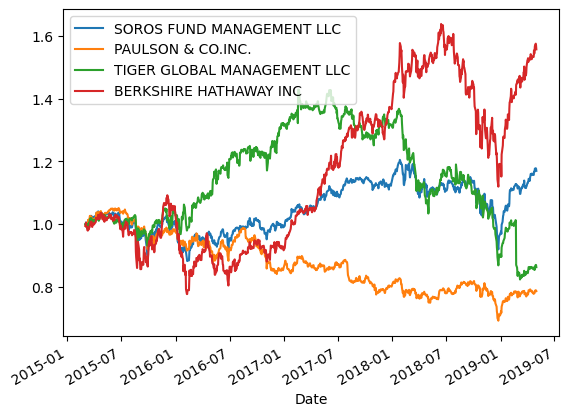

In [156]:
whale_cumulative_returns.plot()

In [157]:
algo_cumulative_returns = (1 + algo_returns_df).cumprod() 
algo_cumulative_returns.head()


,Algo 1,Algo 2
Date,,
2014-06-05,1.004062,1.013285
2014-06-06,1.005927,1.021679
2014-06-09,1.000885,1.027470
2014-06-10,1.005295,1.026714
2014-06-11,1.010081,1.022852


<AxesSubplot:xlabel='Date'>

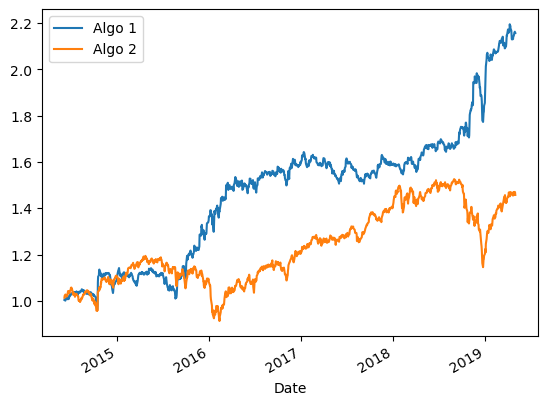

In [158]:
algo_cumulative_returns.plot()

In [159]:
sp_cumulative_returns = (1 + sp_daily_returns).cumprod()
sp_cumulative_returns.head()


,S&P_TSX
Date,
2012-10-02,1.001701
2012-10-03,0.999133
2012-10-04,1.006264
2012-10-05,1.003945
2012-10-09,0.992189


<AxesSubplot:xlabel='Date'>

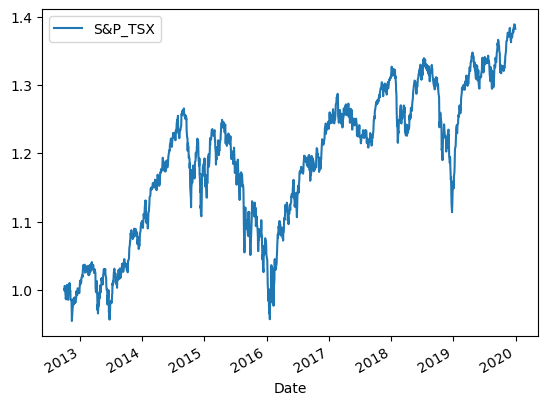

In [160]:
sp_cumulative_returns.plot()

In [161]:
# Calculate cumulative returns of all portfolios
# Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod() 
cumulative_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<AxesSubplot:xlabel='Date'>

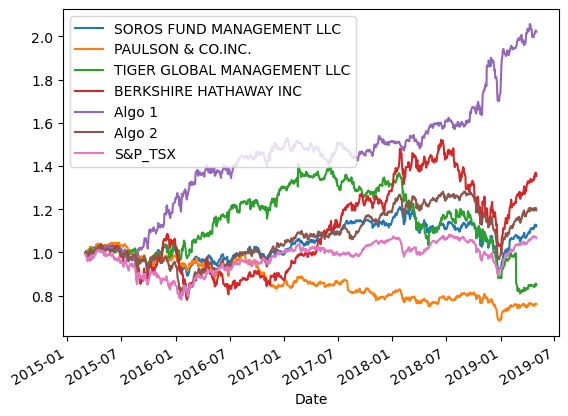

In [162]:
cumulative_returns.plot()

In [163]:
#Algo 1 and Berkshire portfolios outperform S&P_TSX

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

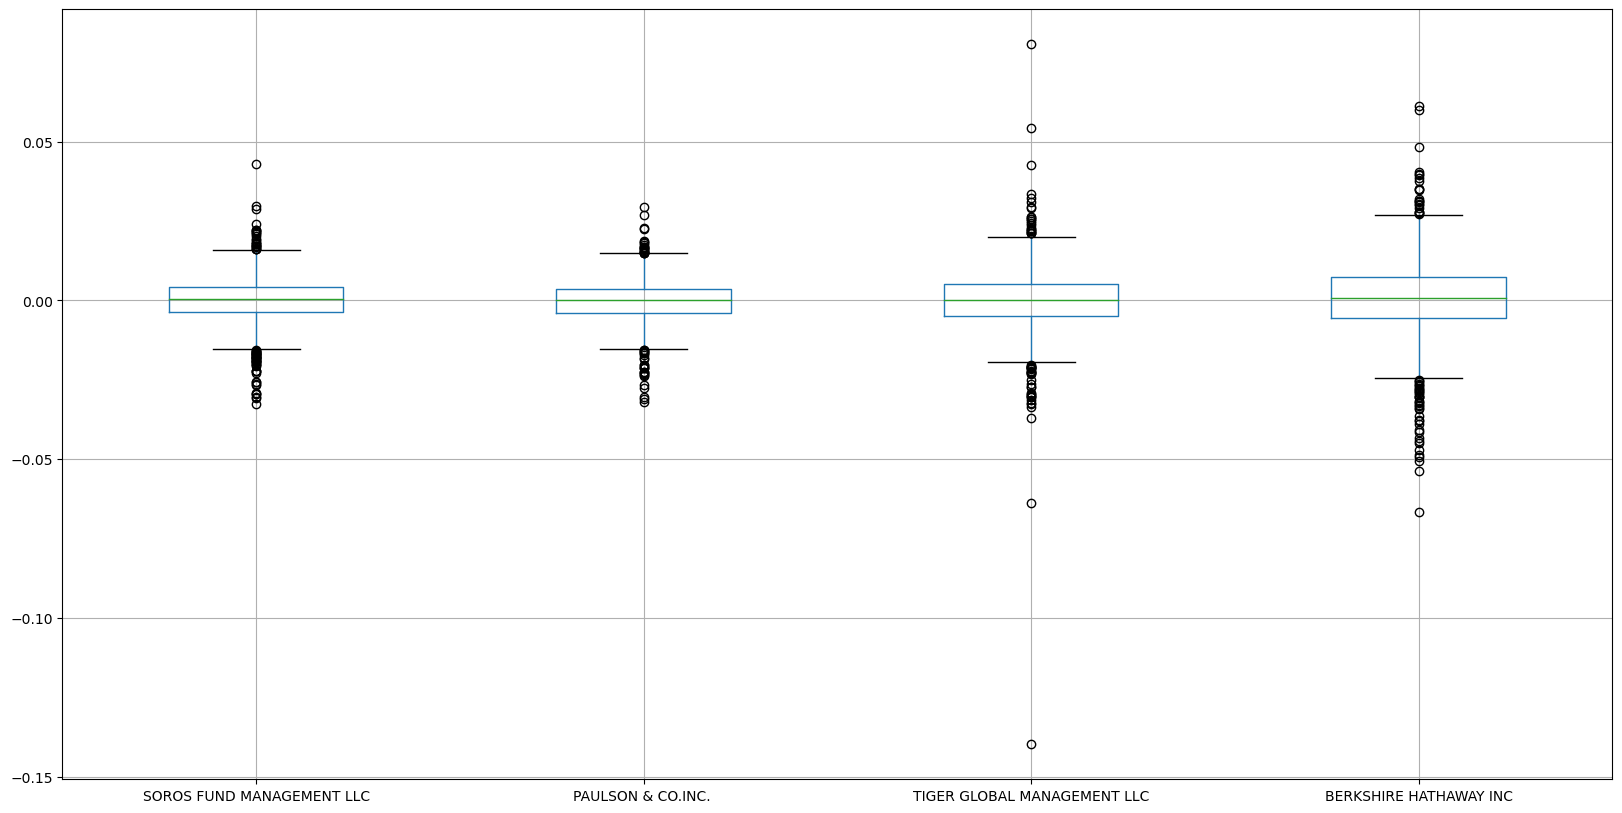

In [164]:
# Box plot to visually show risk
whale_returns_df.boxplot(figsize=(20,10))

<AxesSubplot:>

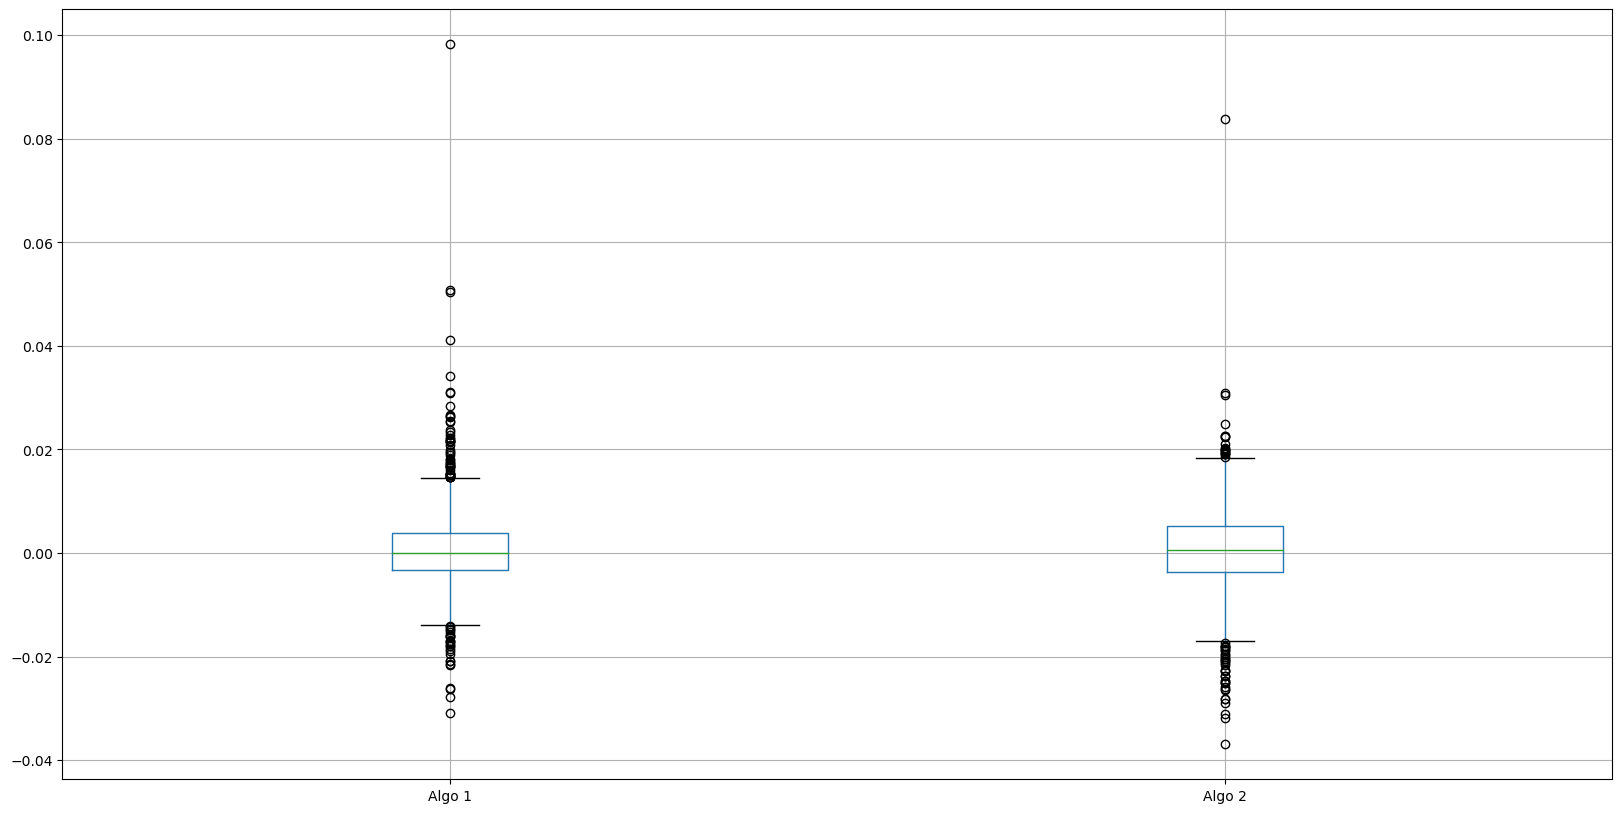

In [165]:

algo_returns_df.boxplot(figsize=(20,10))

<AxesSubplot:>

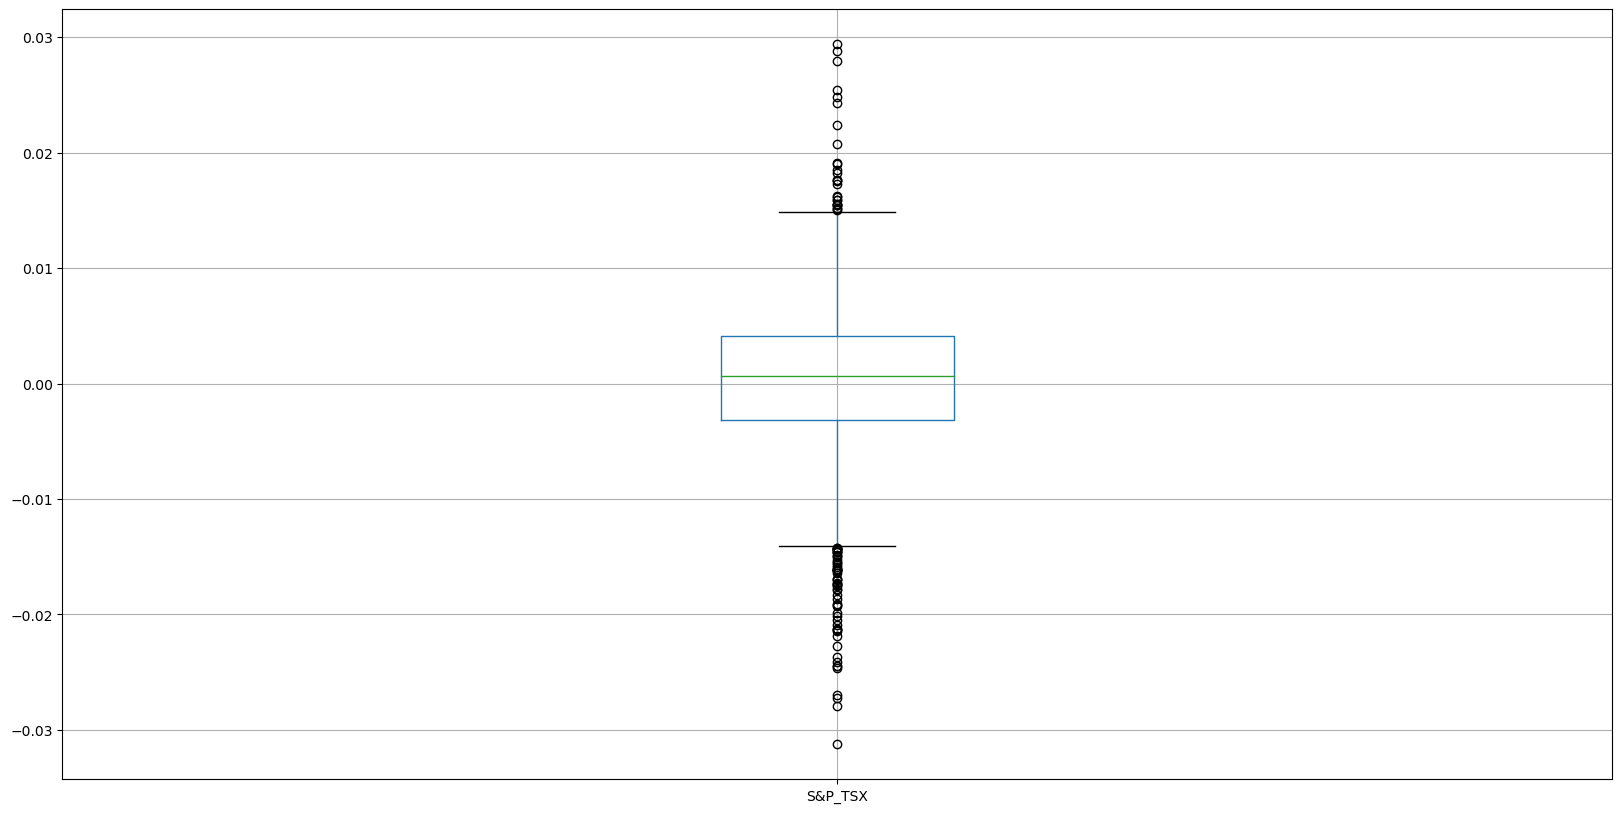

In [166]:

sp_daily_returns.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [167]:
# Calculate the daily standard deviations of all portfolios
whale_returns_std = whale_returns_df.std()
whale_returns_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [168]:
algo_returns_std = algo_returns_df.std()
algo_returns_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [169]:
sp_tsx_history_std = sp_daily_returns.std()
sp_tsx_history_std.head()

S&P_TSX    0.006637
dtype: float64

In [170]:
combined_std = combined_df.std()
combined_std.head()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [171]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = sp_daily_returns.std()
sp_tsx_std.head()



S&P_TSX    0.006637
dtype: float64

In [172]:
# Determine which portfolios are riskier than the S&P TSX 60
algo_std = algo_returns_df.std()
algo_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [173]:

whale_std = whale_returns_df.std()
whale_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [174]:
combined_std > combined_std['S&P_TSX']



SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P_TSX                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [175]:
# Calculate the annualized standard deviation (252 trading days)
whale_std = whale_std * np.sqrt(252)
whale_std.head()

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [176]:
algo_std = algo_std * np.sqrt(252)
algo_std.head()

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [177]:
sp_tsx_std = sp_tsx_std * np.sqrt(252)
sp_tsx_std.head()

S&P_TSX    0.105365
dtype: float64

In [178]:
annualized_std = combined_std * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

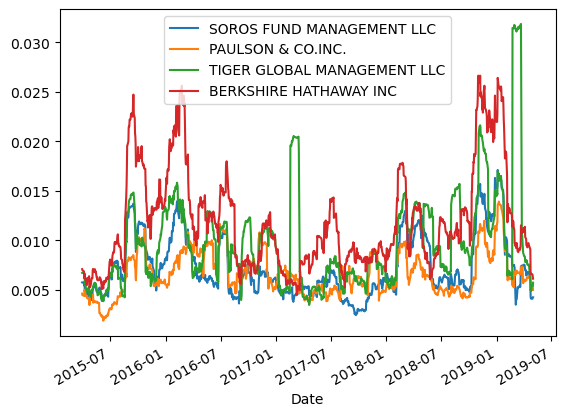

In [179]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation

whale_returns_df.rolling(window=21).std().plot()


<AxesSubplot:xlabel='Date'>

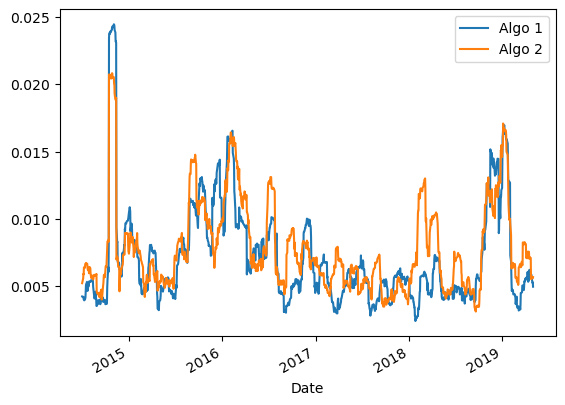

In [180]:
algo_returns_df.rolling(window=21).std().plot()

<AxesSubplot:xlabel='Date'>

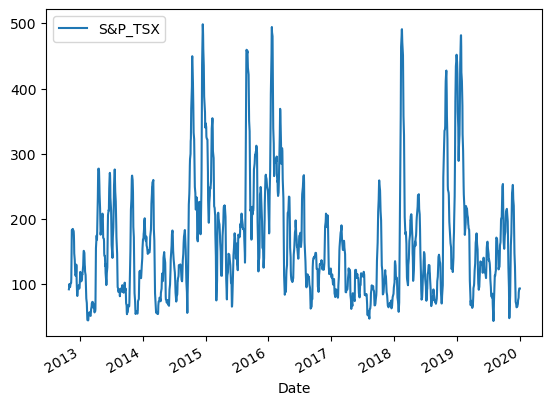

In [181]:
sp_tsx_history_df.rolling(window=21).std().plot()

<AxesSubplot:xlabel='Date'>

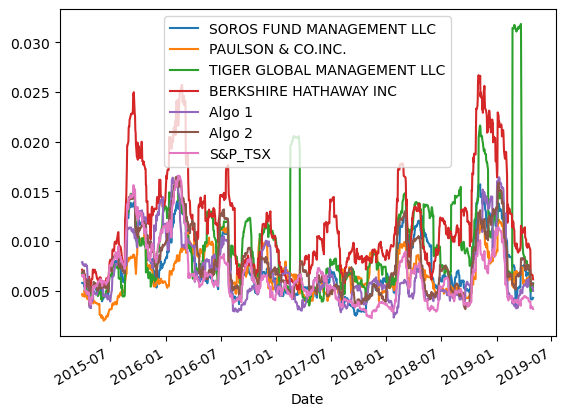

In [182]:
combined_df.rolling(window=21).std().plot()


### Calculate and plot the correlation

In [183]:
# Calculate the correlation
correlation = combined_df.corr()
correlation




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P_TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

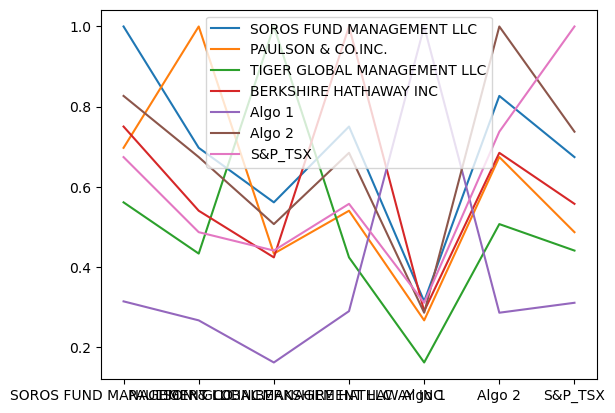

In [219]:
# Display de correlation matrix
combined_df.corr().plot()


In [226]:
correlation

<AxesSubplot:>

<AxesSubplot:>

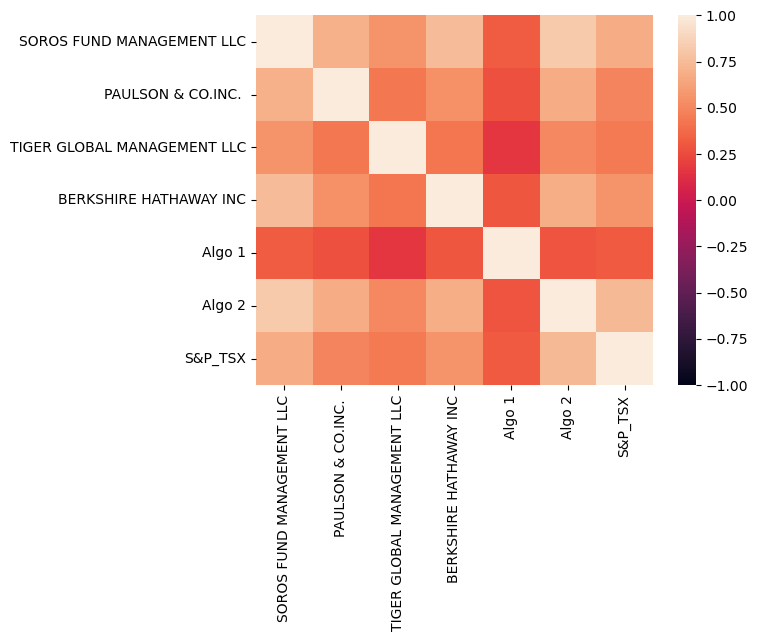

In [229]:
sns.heatmap(combined_df.corr(), vmin=-1, vmax=1) 

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [187]:
# Calculate covariance of a single portfolio
covariance = whale_returns_df['SOROS FUND MANAGEMENT LLC'].cov(sp_tsx_history_df['S&P_TSX'])
covariance






0.5195745377643173

In [188]:
# Calculate variance of S&P TSX
variance = sp_tsx_history_df['S&P_TSX'].var()
variance


1764480.814673932

In [189]:
# Computing beta

Soros_beta = covariance / variance
Soros_beta

2.9446312674152384e-07

In [190]:
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Soros Returns vs. S&P 500 Returns'}, xlabel='Date'>

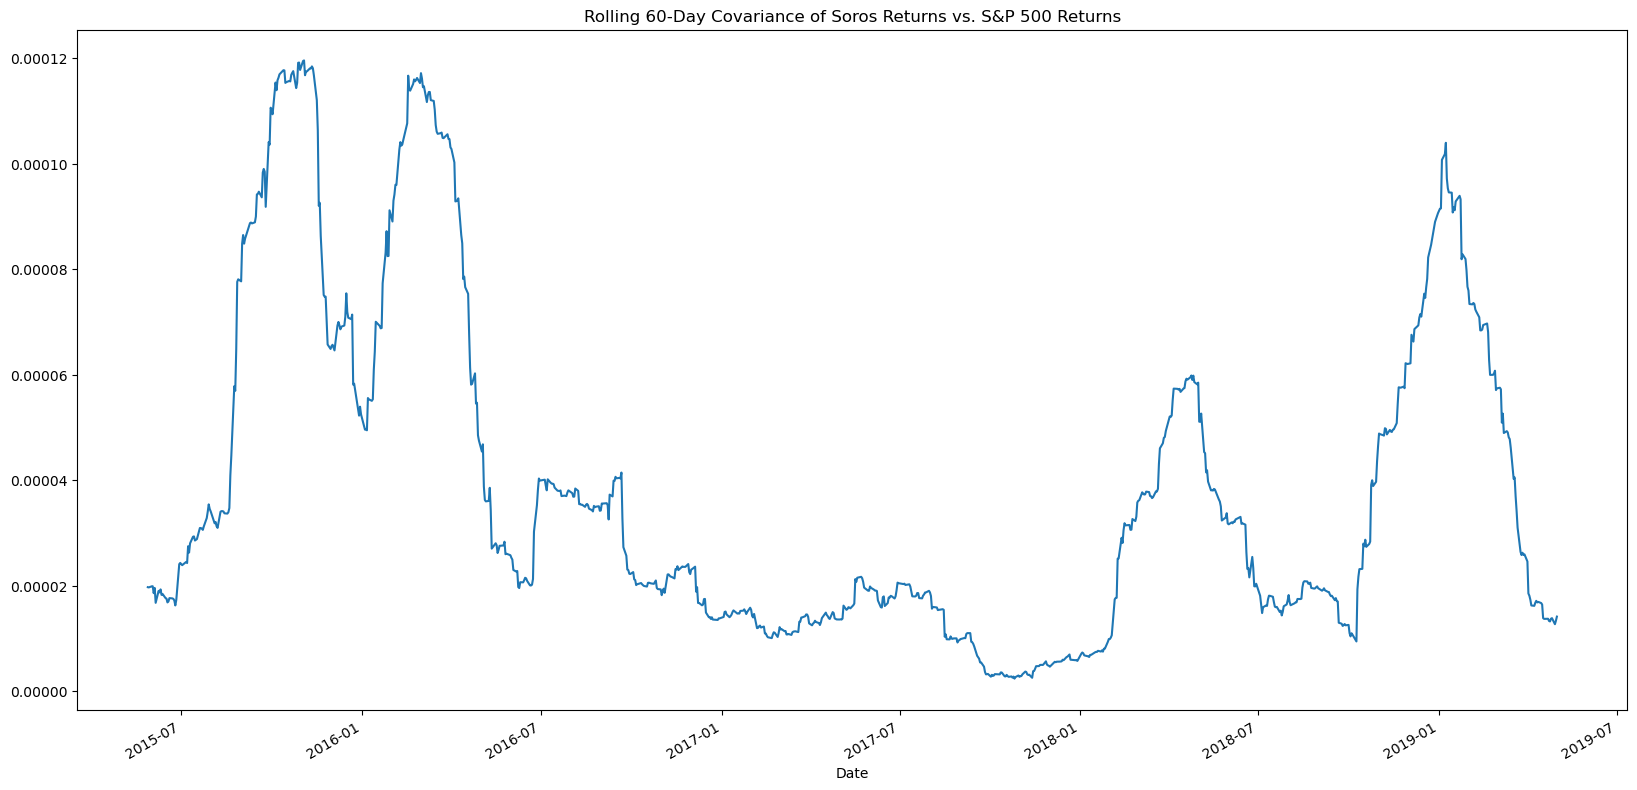

In [191]:
# Plot beta trend
rolling_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P_TSX'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Soros Returns vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [192]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [193]:
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P_TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

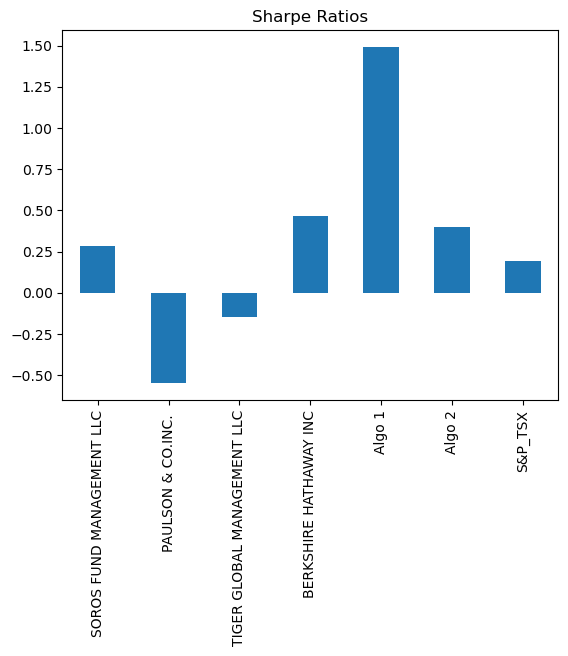

In [194]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot.bar(title="Sharpe Ratios")

In [195]:
#Algo 1 outperforms both whales portfolios and S&P TSX

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [196]:
#Algo 1 outperforms both whales portfolios and S&P TSX

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [197]:
# Reading data from 1st stock
csv_path = Path("l_historical.csv")
l_historical_df = pd.read_csv(csv_path)
pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
l_historical_df = l_historical_df.set_index("Date")
l_historical_df.head()

,Symbol,Close
Date,,
1/2/2018,L,57.99
1/3/2018,L,57.41
1/4/2018,L,57.42
1/5/2018,L,57.42
1/8/2018,L,56.86


In [198]:
# Reading data from 2nd stock
csv_path = Path("otex_historical.csv")
otex_historical_df = pd.read_csv(csv_path)
pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
otex_historical_df = otex_historical_df.set_index("Date")
otex_historical_df.head()

,Symbol,Close
Date,,
1/2/2018,OTEX,43.58
1/3/2018,OTEX,43.07
1/4/2018,OTEX,42.91
1/5/2018,OTEX,42.57
1/8/2018,OTEX,42.16


In [199]:
# Reading data from 3rd stock
csv_path = Path("shop_historical.csv")
shop_historical_df = pd.read_csv(csv_path)
pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
shop_historical_df = shop_historical_df.set_index("Date")
shop_historical_df.head()

,Symbol,Close
Date,,
1/2/2018,SHOP,132.06
1/3/2018,SHOP,135.15
1/4/2018,SHOP,137.46
1/5/2018,SHOP,137.26
1/8/2018,SHOP,139.51


In [200]:
# Combine all stocks in a single DataFrame closing prices for each ticker
second_combined_df = pd.concat([l_historical_df,otex_historical_df, shop_historical_df], axis="rows", join="inner")
second_combined_df = second_combined_df.reset_index()
second_combined_df = second_combined_df.pivot_table(values="Close", index="Date", columns="Symbol")
second_combined_df.head()



Symbol,L,OTEX,SHOP
Date,,,
1/10/2018,57.09,41.99,139.29
1/10/2019,62.89,45.66,195.96
1/11/2018,56.78,42.29,139.14
1/11/2019,63.86,45.76,198.13
1/12/2018,56.97,42.17,140.76


In [201]:
second_combined_df.index = pd.to_datetime(second_combined_df.index)

In [202]:
# Reset Date index
second_combined_df.reset_index
second_combined_df.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-10,57.09,41.99,139.29
2019-01-10,62.89,45.66,195.96
2018-01-11,56.78,42.29,139.14
2019-01-11,63.86,45.76,198.13
2018-01-12,56.97,42.17,140.76


In [203]:
# Reorganize portfolio data by having a column per symbol
#(see above)


In [204]:
# Calculate daily returns
# Drop NAs
# Display sample data

all_returns = second_combined_df.pct_change().dropna().copy()
all_returns.head()




Symbol,L,OTEX,SHOP
Date,,,
2019-01-10,0.101594,0.087402,0.406849
2018-01-11,-0.097154,-0.073806,-0.289957
2019-01-11,0.124692,0.082052,0.423961
2018-01-12,-0.107892,-0.078453,-0.289557
2019-01-14,0.124627,0.078255,0.404518


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [205]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_returns = all_returns.dot(weights)


# Display sample data

portfolio_returns.head()

Date
2019-01-10    0.198615
2018-01-11   -0.153639
2019-01-11    0.210235
2018-01-12   -0.158634
2019-01-14    0.202467
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [206]:
# Join your returns DataFrame to the original returns DataFrame
combined_df2 = pd.concat([combined_df, second_combined_df], axis="columns", join="inner")
                       
combined_df2.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX,L,OTEX,SHOP
Date,,,,,,,,,,
2018-01-02,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,0.006222,57.99,43.58,132.06
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,57.41,43.07,135.15
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,57.42,42.91,137.46
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,57.42,42.57,137.26
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,56.86,42.16,139.51


In [207]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df2.sort_index
combined_df2.dropna(inplace=True)
combined_df2.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX,L,OTEX,SHOP
Date,,,,,,,,,,
2018-01-02,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,0.006222,57.99,43.58,132.06
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,57.41,43.07,135.15
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,57.42,42.91,137.46
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,57.42,42.57,137.26
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,56.86,42.16,139.51


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [208]:
# Calculate the annualized `std`
annualized2_std = combined_df2.std() * np.sqrt(252)
annualized2_std.head()

SOROS FUND MANAGEMENT LLC      0.146012
PAULSON & CO.INC.              0.114944
TIGER GLOBAL MANAGEMENT LLC    0.219519
BERKSHIRE HATHAWAY INC         0.228696
Algo 1                         0.119845
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

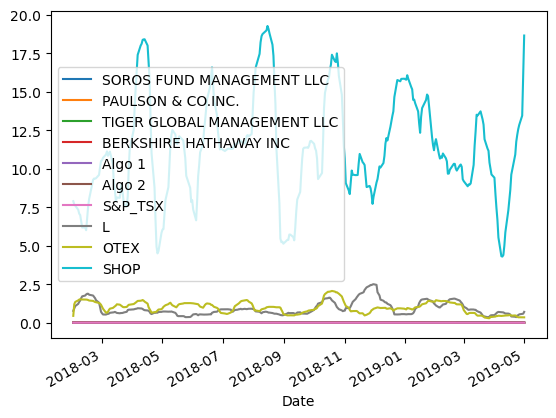

In [209]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
combined_df2.rolling(window=21).std().plot()

### Calculate and plot the correlation

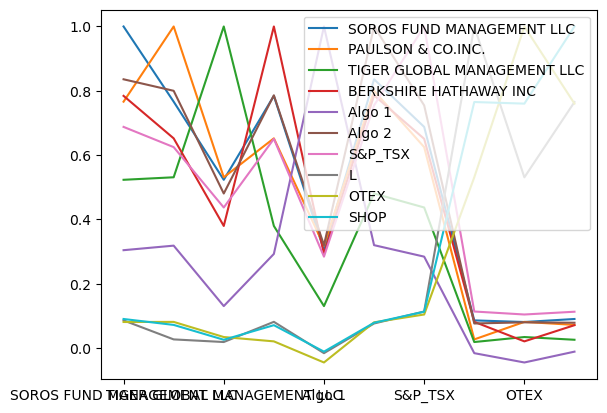

In [210]:
# Calculate and plot the correlation
combined_df2.correlation = combined_df2.corr().plot()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Otex vs. S&P 500 Returns'}, xlabel='Date'>

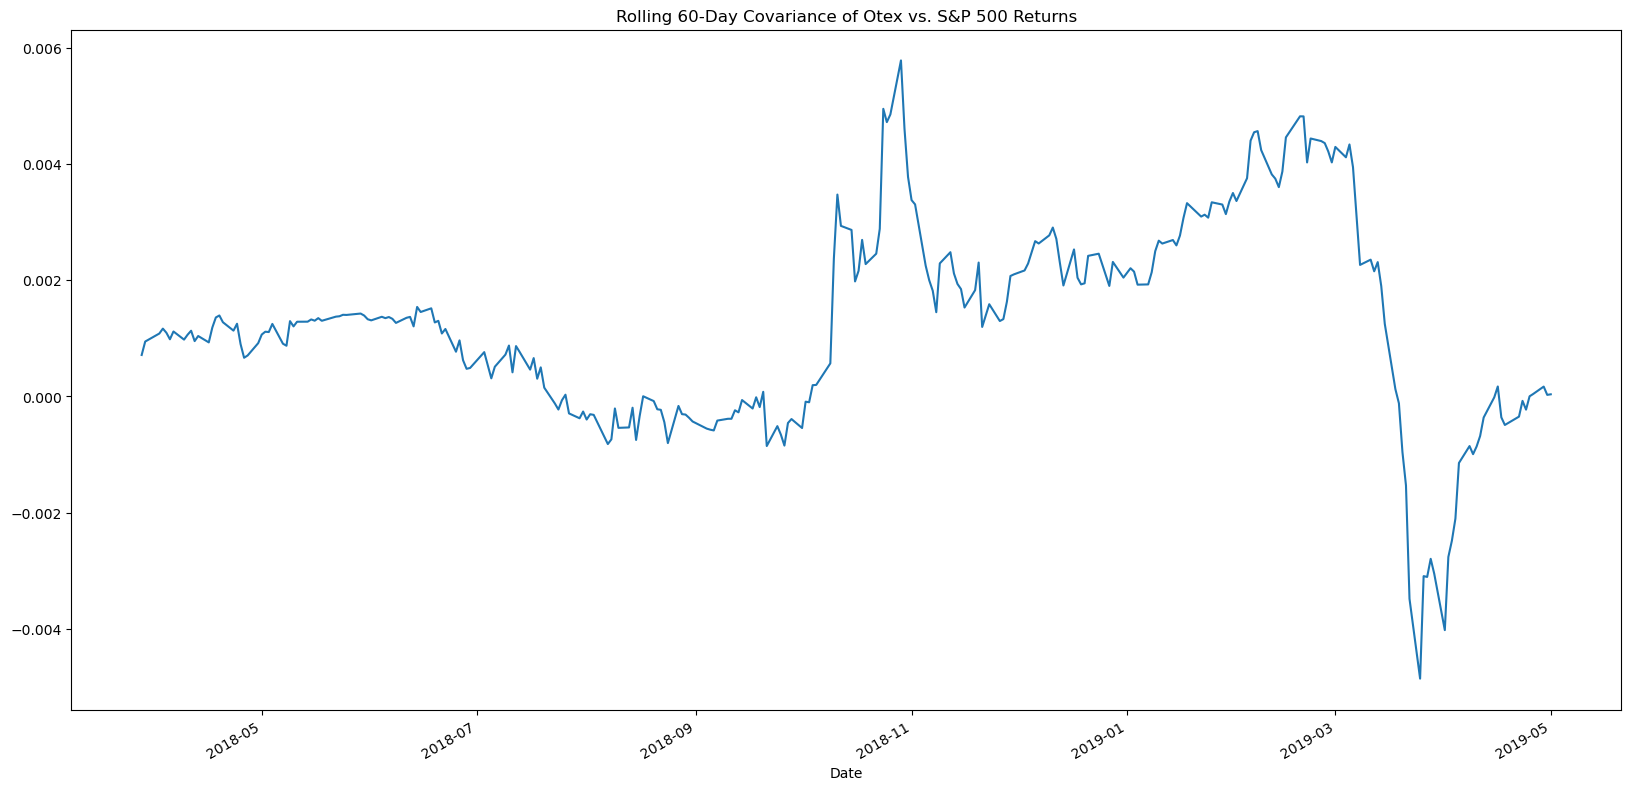

In [211]:
# Calculate and plot Beta

rolling_covariance = combined_df2['OTEX'].rolling(window=60).cov(combined_df['S&P_TSX'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Otex vs. S&P 500 Returns')






In [212]:
covariance = combined_df2['OTEX'].cov(combined_df['S&P_TSX'])
covariance


0.0019419813946490278

In [213]:
variance = combined_df['S&P_TSX'].var()
variance



4.9479515915131015e-05

In [214]:
Otex_beta = covariance / variance
Otex_beta

39.248189048170595

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [215]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios2 = (combined_df2.mean() * 252) / (combined_df2.std() * np.sqrt(252))
sharpe_ratios2

SOROS FUND MANAGEMENT LLC       -0.011416
PAULSON & CO.INC.               -0.292758
TIGER GLOBAL MANAGEMENT LLC     -1.406053
BERKSHIRE HATHAWAY INC           0.298127
Algo 1                           1.906586
Algo 2                           0.116630
S&P_TSX                          0.082631
L                              227.714574
OTEX                           250.227506
SHOP                            81.744226
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

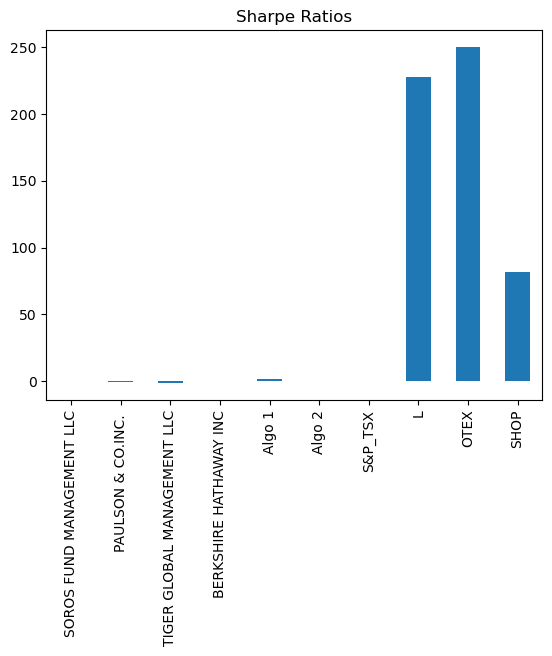

In [216]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot.bar(title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [217]:
#Otex out performs all portfolios annalised within all portfolios. L portfolio is also a solid performer.